In [60]:
# import keras and lets build model cnn and train it

In [1]:
import os,glob,keras,random
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot as plt


(128, 128, 128, 5)
(128, 128, 128, 3)


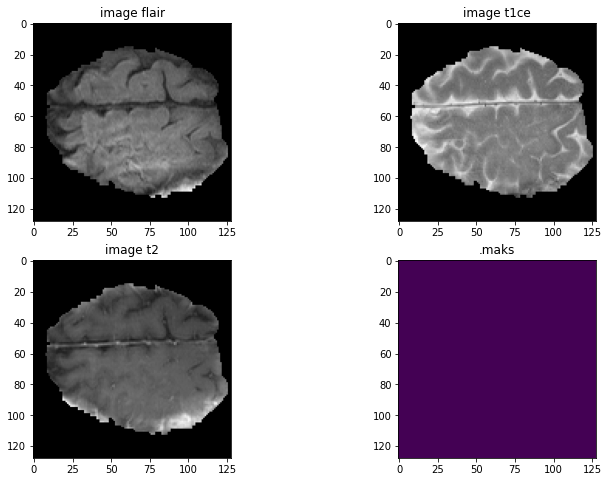

In [2]:
img_dir1="/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/images/"
mask_dir1="/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/masks/"
img_list1=os.listdir(img_dir1)
mask_list1=os.listdir(mask_dir1)

image_num=len(os.listdir(img_dir1))

img_num=random.randint(0,image_num-1)#.astye(np.float32)
#print(img_num.from_bytes)
test_image=np.load(img_dir1+img_list1[img_num])
test_mask=np.load(mask_dir1+mask_list1[img_num])
test_mask=test_mask.astype(np.float32)
print(test_mask.shape)
print(test_image.shape)
#test_mask=np.argmax(test_mask,axis=3)
#print(test_mask.shape)

n_slice=random.randint(0,test_image.shape[2])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(test_image[:,:, n_slice,0],cmap='gray')
plt.title('image flair')
plt.subplot(222)
#plt.imshow(combine_x[:,:, image_slice ,1],cmap='gray')
#plt.title('image t1')
#plt.subplot(223)
plt.imshow(test_image[:,:,n_slice ,1],cmap='gray')
plt.title('image t1ce')
plt.subplot(223)
plt.imshow(test_image[:,:, n_slice,2],cmap='gray')
plt.title('image t2')
plt.subplot(224)
plt.imshow(test_mask[:,: ,n_slice,4])
plt.title('.maks')
plt.show()

In [3]:
test_image.dtype

dtype('float64')

In [22]:
print(np.unique(test_mask))

[0. 1.]


In [4]:
test_mask.dtype

dtype('float32')

In [5]:
#p=test_image+test_mask

(128, 128, 128, 5)
(128, 128, 128, 3)
1
(128, 128, 128, 3)
(128, 128, 128, 5)


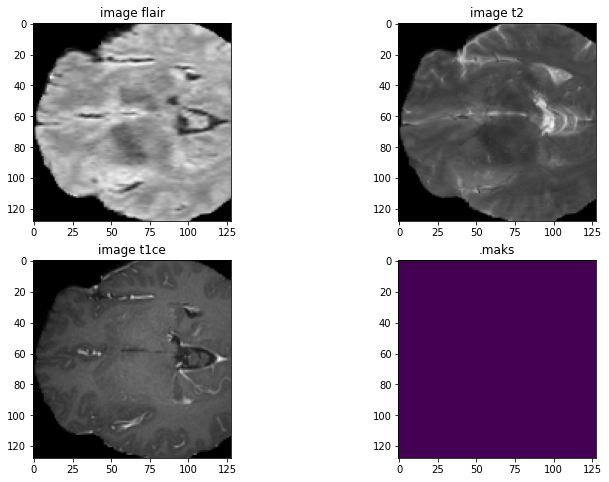

(128, 128, 128, 5)
float32


In [6]:
%run Custom_Data_gen.ipynb -i image_loader

In [7]:
import pandas as pd

In [68]:
"""
columns=['0','1','2','3','4']
df=pd.DataFrame(columns=columns)
mask_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/masks/*.npy'))
for img in range(len(mask_list)):
    print(img)
    temp_image=np.load(mask_list[img])
    #print(temp_image.shape)
    #temp_image=np.argmax(temp_image,axis=3)
    val,counts=np.unique(temp_image,return_counts=True)
    zipped=zip(columns,counts)
    print(temp_image.shape)
    conts_dict=dict(zipped)
    print(conts_dict)
    
    
    df=df.append(conts_dict,ignore_index=True)
    
label_0=df['0'].sum()
label_1=df['1'].sum()

label_2=df['2'].sum()
label_3=df['3'].sum()
label_4=df['4'].sum()
total_labels=label_0+label_1+label_2+label_3+label_4
n_classes=5

wt0=round((total_labels/(n_classes*label_0)),2)
wt1=round((total_labels/(n_classes*label_1)),2)
wt2=round((total_labels/(n_classes*label_2)),2)
wt3=round((total_labels/(n_classes*label_3)),2)
wt4=round((total_labels/(n_classes*label_4)),2)

"""

"\ncolumns=['0','1','2','3','4']\ndf=pd.DataFrame(columns=columns)\nmask_list=sorted(glob.glob('C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/masks/*.npy'))\nfor img in range(len(mask_list)):\n    print(img)\n    temp_image=np.load(mask_list[img])\n    #print(temp_image.shape)\n    #temp_image=np.argmax(temp_image,axis=3)\n    val,counts=np.unique(temp_image,return_counts=True)\n    zipped=zip(columns,counts)\n    print(temp_image.shape)\n    conts_dict=dict(zipped)\n    print(conts_dict)\n    \n    \n    df=df.append(conts_dict,ignore_index=True)\n    \nlabel_0=df['0'].sum()\nlabel_1=df['1'].sum()\n\nlabel_2=df['2'].sum()\nlabel_3=df['3'].sum()\nlabel_4=df['4'].sum()\ntotal_labels=label_0+label_1+label_2+label_3+label_4\nn_classes=5\n\nwt0=round((total_labels/(n_classes*label_0)),2)\nwt1=round((total_labels/(n_classes*label_1)),2)\nwt2=round((total_labels/(n_classes*label_2)),2)\nwt3=round((total_labels/(n_classes*label_3)),2)\nwt4=round((total_labels/(n_clas

In [69]:
#print(np.unique(temp_image))

[0. 1.]


In [71]:
#print(temp_image.shape)

In [77]:
#wt0

wt1

In [72]:
#wt1

In [73]:
#wt2

In [74]:
#wt3

In [75]:
#wt4

In [76]:
#df

In [23]:
img_dir="C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/images/"
mask_dir="C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/train/masks/"

val_img_dir="C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/val/images/"
val_mask_dir="C:/Users/profe/Downloads/BraTS-2015/BRATS2015_Training/input_data/val/masks/"

In [24]:
img_list2=os.listdir(img_dir)
mask_list2=os.listdir(mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list=os.listdir(val_mask_dir)

In [25]:
batch_size=2

In [26]:
img_datagen=imageLoader(img_dir,img_list2,mask_dir,mask_list2,batch_size)

In [27]:
val_img_datagen=imageLoader(val_img_dir,val_img_list,val_mask_dir,val_mask_list,batch_size)

In [28]:
val_img,val_mask=val_img_datagen.__next__()

In [29]:
img1,msk1=img_datagen.__next__()

In [30]:
img1

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [45]:
msk1.shape
#print(msk1.dtype)
print(np.unique(msk1))

[0. 1.]


In [32]:
img1.shape

(2, 128, 128, 128, 3)

0
(128, 128, 128, 3)
(128, 128, 128, 5)


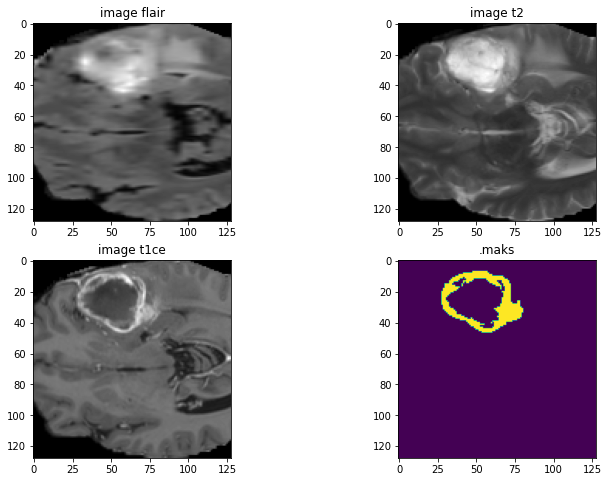

In [33]:
img_num=random.randint(0,img1.shape[0]-1)
print(img_num)
test_image=img1[img_num]
print(test_image.shape)
test_mask=msk1[img_num]
print(test_mask.shape)
#test_mask=np.argmax(test_mask,axis=3)

n_slice=random.randint(0,test_image.shape[2])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(test_image[:,:,n_slice,0],cmap='gray')
plt.title('image flair')
plt.subplot(222)
#plt.imshow(combine_x[:,:, image_slice ,1],cmap='gray')
#plt.title('image t1')
#plt.subplot(223)
plt.imshow(test_image[:,:,n_slice ,1],cmap='gray')
plt.title('image t2')
plt.subplot(223)
plt.imshow(test_image[:,:, n_slice,2],cmap='gray')
plt.title('image t1ce')
plt.subplot(224)
plt.imshow(test_mask[:,:, n_slice,4])
plt.title('.maks')
plt.show()


In [34]:
val_img

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         ...,

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0.

In [52]:
val_mask.shape

(2, 128, 128, 128, 5)

In [36]:
val_img.shape

(2, 128, 128, 128, 3)

0
(128, 128, 128, 3)
(128, 128, 128, 5)


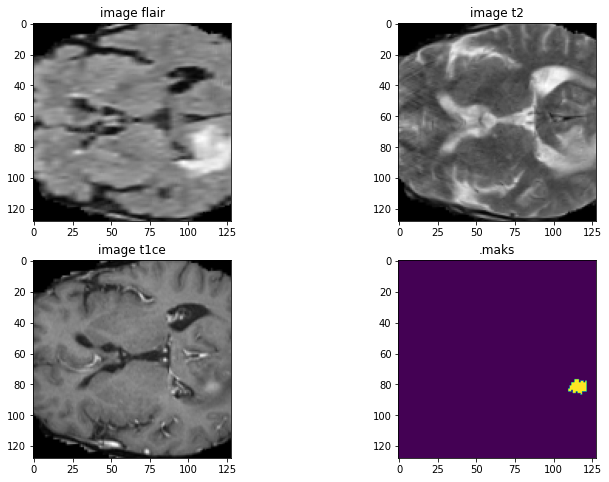

In [67]:
img_num=random.randint(0,val_img.shape[0]-1)
print(img_num)
test_image=val_img[img_num]
print(test_image.shape)
test_mask=val_mask[img_num]


print(test_mask.shape)
#test_mask=np.argmax(test_mask,axis=3)
#print(test_mask.shape)

n_slice=random.randint(0,test_image.shape[2])
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(test_image[:,:,n_slice,0],cmap='gray')
plt.title('image flair')
plt.subplot(222)
#plt.imshow(combine_x[:,:, image_slice ,1],cmap='gray')
#plt.title('image t1')
#plt.subplot(223)
plt.imshow(test_image[:,:,n_slice ,1],cmap='gray')
plt.title('image t2')
plt.subplot(223)
plt.imshow(test_image[:,:, n_slice,2],cmap='gray')
plt.title('image t1ce')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice,4])
plt.title('.maks')
plt.show()

In [62]:
#pip install segmentation_models_3D 

In [63]:
import segmentation_models_3D as sm

In [64]:
wt0,wt1,wt2,wt3,wt4=0.21,65.64,6.43,38.57,19.37

In [65]:
dice_loss=sm.losses.DiceLoss(class_weights=np.array([wt0,wt1,wt2,wt3,wt4]))
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss+(1*focal_loss)

metrics=['accuracy',sm.metrics.IOUScore(threshold=0.5)]

LR=0.0001
optim=keras.optimizers.Adam(LR)

In [70]:
steps_per_epoch=len(img_list2)//batch_size
val_steps_per_epoch=len(val_img_list)//batch_size



In [92]:
#pip install unet

In [29]:
#

In [46]:
#import unet

In [47]:
#import keras_unet

In [59]:
#